# **Movie Recommender System**

In [3]:
import numpy as np
import pandas as pd

In [4]:
movies = pd.read_csv('../Train data/tmdb_5000_movies.csv')
credits = pd.read_csv('../Train data/datatmdb_5000_credits.csv')

In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
credits.head(1)['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

# **A. PREPROCESSING**
# 1. Merging 2 available datasets

In [8]:
movies = movies.merge(credits, on='title')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

# 2. Removing not needed columns. [i'm not considering numeric cols]
Important cols
1. genres
2. id
3. keywords
4. title
5. overview
6. cast
7. crew

In [10]:
movies = movies[['movie_id','genres',  'keywords', 'title', 'overview','cast', 'crew']]

In [11]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
movies.isnull().sum()
movies.dropna(inplace=True)

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   genres    4806 non-null   object
 2   keywords  4806 non-null   object
 3   title     4806 non-null   object
 4   overview  4806 non-null   object
 5   cast      4806 non-null   object
 6   crew      4806 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.4+ KB


# 3. Processing the genres column --> to find which genre the movie belongs to

In [14]:
movies['genres'].values

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]',
       '[]', '[{"id": 99, "name": "Documentary"}]'], dtype=object)

In [15]:
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj): # To extract list from string of list.
        L.append(i['name'])
    return L

In [16]:
movies['genres'] = movies['genres'].apply(convert)

In [17]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 4. Processing the keywords column --> To find keywords available for movie

In [18]:
movies['keywords'] = movies['keywords'].apply(convert)

In [19]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 5. Processing the cast column --> To find top 3 actors

In [20]:
movies['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [21]:
def convert_cast(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj): # To extract list from string of list.
        if counter!= 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [22]:
movies['cast'] = movies['cast'] = movies['cast'].apply(convert_cast)

In [23]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 6. Processing the crew column --> to find the director

In [24]:
movies['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [25]:
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj): # To extract list from string of list.
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [26]:
movies['crew'] = movies['crew'].apply(fetch_director)

movies.head()

# 7. Splitting the overview column based on comma

In [27]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [28]:
movies['overview'] = movies['overview'].apply(lambda x : x.split())

In [29]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


i. Sam Worthington
ii. Sam Mendes 
These 2 can refer to same name -> 'Sam'

In [30]:
movies['genres'] = movies['genres'].apply(lambda x : [i.replace(" ", "") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x : [i.replace(" ", "") for i in x])
movies['cast'] = movies['cast'].apply(lambda x : [i.replace(" ", "") for i in x])
movies['crew'] = movies['crew'].apply(lambda x : [i.replace(" ", "") for i in x])

In [31]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


# 8. Combining every columns to single tag col.

In [32]:
movies['tags'] = movies['overview'] + movies['genres'] +  movies['keywords'] +movies['cast'] +movies['crew']

In [33]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew,tags
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [34]:
new_df = movies[['movie_id', 'title', 'tags']]

In [35]:
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [36]:
new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))
new_df.head()

C:\Users\Anjal Bhattarai\AppData\Local\Temp\ipykernel_17576\2140201408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [37]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

**Recommend: lowercase**

In [38]:
new_df['tags'] = new_df['tags'].apply(lambda x : x.lower())
new_df.head()

C:\Users\Anjal Bhattarai\AppData\Local\Temp\ipykernel_17576\657974225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x : x.lower())


,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


## Consider Similar names using NLP
eg: accept and accepted.

In [39]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))

In [41]:
#Example:
['loved', 'love', 'loving']
ps.stem('loved')

'love'

In [42]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [43]:
new_df['tags'].apply(stem)

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

# **B. Vectorization**
-> Every movie is a vector. <br>
-> Suggest the nearest vector.

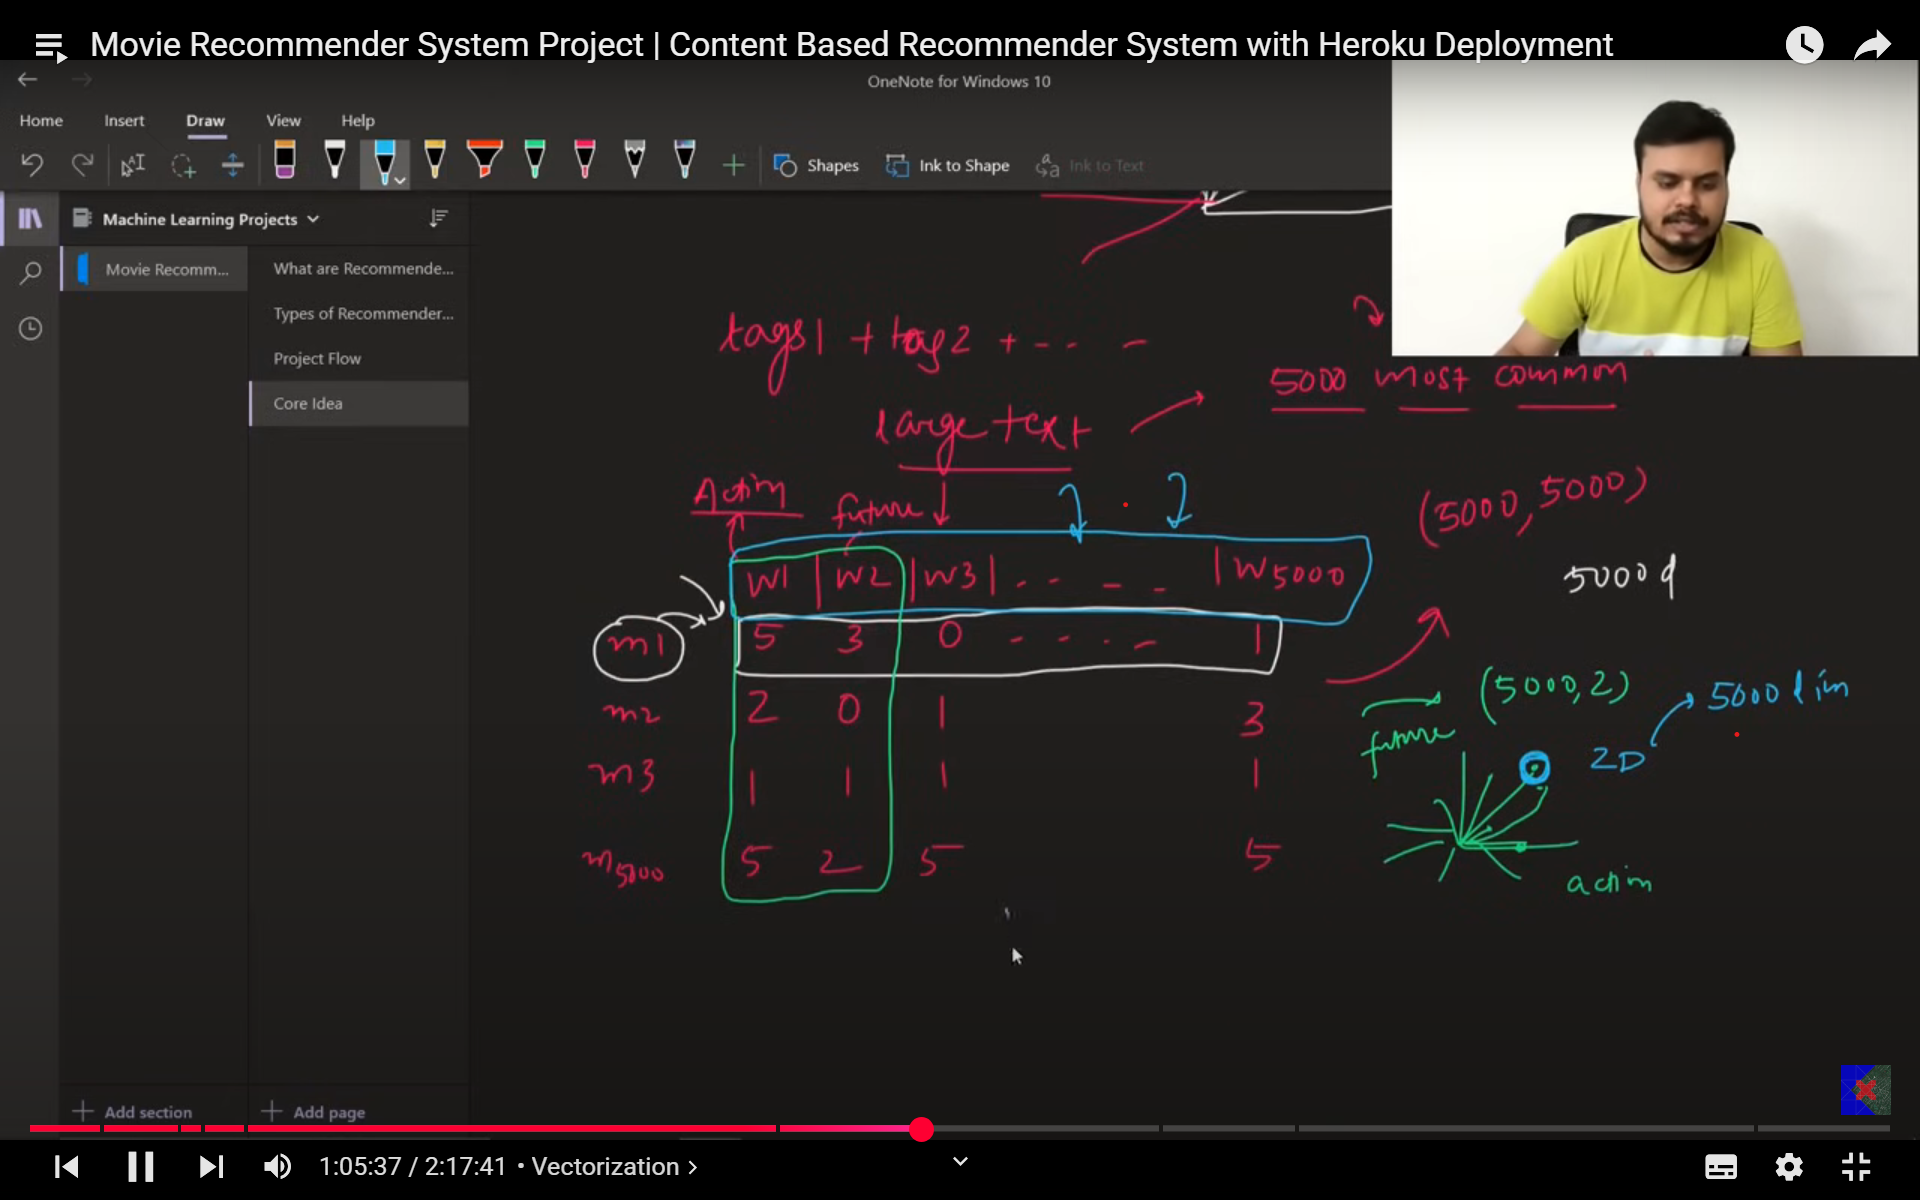

# I. Convert every movie into single vector of <|numbers|> using code below:

In [44]:
from sklearn.feature_extraction.text  import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english') # Given, 5000 

In [45]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [46]:
print(vectors.shape)
vectors

(4806, 5000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
cv.get_feature_names_out()[:100] # To check which of the most repeated are selected as our 5000 columns/features

array(['000', '007', '10', '100', '11', '12', '13', '14', '15', '16',
       '17', '18', '18th', '19', '1930s', '1940s', '1950', '1950s',
       '1960s', '1970s', '1980', '1980s', '1985', '1990s', '1999', '19th',
       '19thcentury', '20', '200', '2009', '20th', '24', '25', '30',
       '300', '3d', '40', '50', '500', '60', '60s', '70', '70s', 'aaron',
       'aaroneckhart', 'abandoned', 'abducted', 'abigailbreslin',
       'abilities', 'ability', 'able', 'aboard', 'abuse', 'abusive',
       'academy', 'accept', 'accepted', 'accepts', 'access', 'accident',
       'accidental', 'accidentally', 'accompanied', 'accomplish',
       'account', 'accountant', 'accused', 'ace', 'achieve', 'act',
       'acting', 'action', 'actionhero', 'actions', 'activist',
       'activities', 'activity', 'actor', 'actors', 'actress', 'acts',
       'actual', 'actually', 'adam', 'adams', 'adamsandler',
       'adamshankman', 'adaptation', 'adapted', 'addict', 'addicted',
       'addiction', 'adolescence', '

## ii. FIND SIMILARITY SCORE OF EACH MOVIES WITH OTHER MOVIES USING CODE BELOW
#### **Cosine distance is calculated not Euclidean distance** --> High dimension practice

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
similarity # returns similariy score matrix; 4806 X 4806

array([[1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
        0.        ],
       [0.08964215, 1.        , 0.0625    , ..., 0.02635231, 0.        ,
        0.        ],
       [0.05976143, 0.0625    , 1.        , ..., 0.02635231, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02635231, ..., 1.        , 0.0745356 ,
        0.04836508],
       [0.02817181, 0.        , 0.        , ..., 0.0745356 , 1.        ,
        0.05407381],
       [0.        , 0.        , 0.        , ..., 0.04836508, 0.05407381,
        1.        ]])

### create functin whcih gives similar movies

## III. MAIN FUNCTION TO RECOMMEND 5 OF SUCH MOVIES

In [49]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0] # returns index of that movie
    distance = similarity[movie_index] # calculate similarity score with all other movies
    movies_list = sorted(list(enumerate(distance)), reverse=True, key = lambda x : x[1])[1:6] # Extract those movies with 5 best similarity score

    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [50]:
recommend('Avatar')

Titan A.E.
Small Soldiers
Independence Day
Ender's Game
Aliens vs Predator: Requiem


In [51]:
import pickle

In [52]:
pickle.dump(new_df, open('model.pkl', 'wb'))

In [66]:
pickle.dump(new_df.to_dict(), open('movie_dict.pkl', 'wb'))

In [68]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [62]:
#new_df

In [63]:
new_df.to_dict()

{'movie_id': {0: 19995,
  1: 285,
  2: 206647,
  3: 49026,
  4: 49529,
  5: 559,
  6: 38757,
  7: 99861,
  8: 767,
  9: 209112,
  10: 1452,
  11: 10764,
  12: 58,
  13: 57201,
  14: 49521,
  15: 2454,
  16: 24428,
  17: 1865,
  18: 41154,
  19: 122917,
  20: 1930,
  21: 20662,
  22: 57158,
  23: 2268,
  24: 254,
  25: 597,
  26: 271110,
  27: 44833,
  28: 135397,
  29: 37724,
  30: 558,
  31: 68721,
  32: 12155,
  33: 36668,
  34: 62211,
  35: 8373,
  36: 91314,
  37: 68728,
  38: 102382,
  39: 20526,
  40: 49013,
  41: 44912,
  42: 10193,
  43: 534,
  44: 168259,
  45: 72190,
  46: 127585,
  47: 54138,
  48: 81005,
  49: 64682,
  50: 9543,
  51: 68726,
  52: 38356,
  53: 217,
  54: 105864,
  55: 62177,
  56: 188927,
  57: 10681,
  58: 5174,
  59: 14161,
  60: 17979,
  61: 76757,
  62: 258489,
  63: 411,
  64: 246655,
  65: 155,
  66: 14160,
  67: 15512,
  68: 1726,
  69: 44826,
  70: 8487,
  71: 1735,
  72: 297761,
  73: 2698,
  74: 137113,
  75: 9804,
  76: 14869,
  77: 150540,
  78: